<a href="https://colab.research.google.com/github/kashifkhan9555/Netflix_Movies_and_tv_show_clustring/blob/main/Netflix_Movies_and_tv_show_clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime as dt

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Netflix_Movies and tv show clustring./NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv', encoding = 'latin1')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

In [6]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

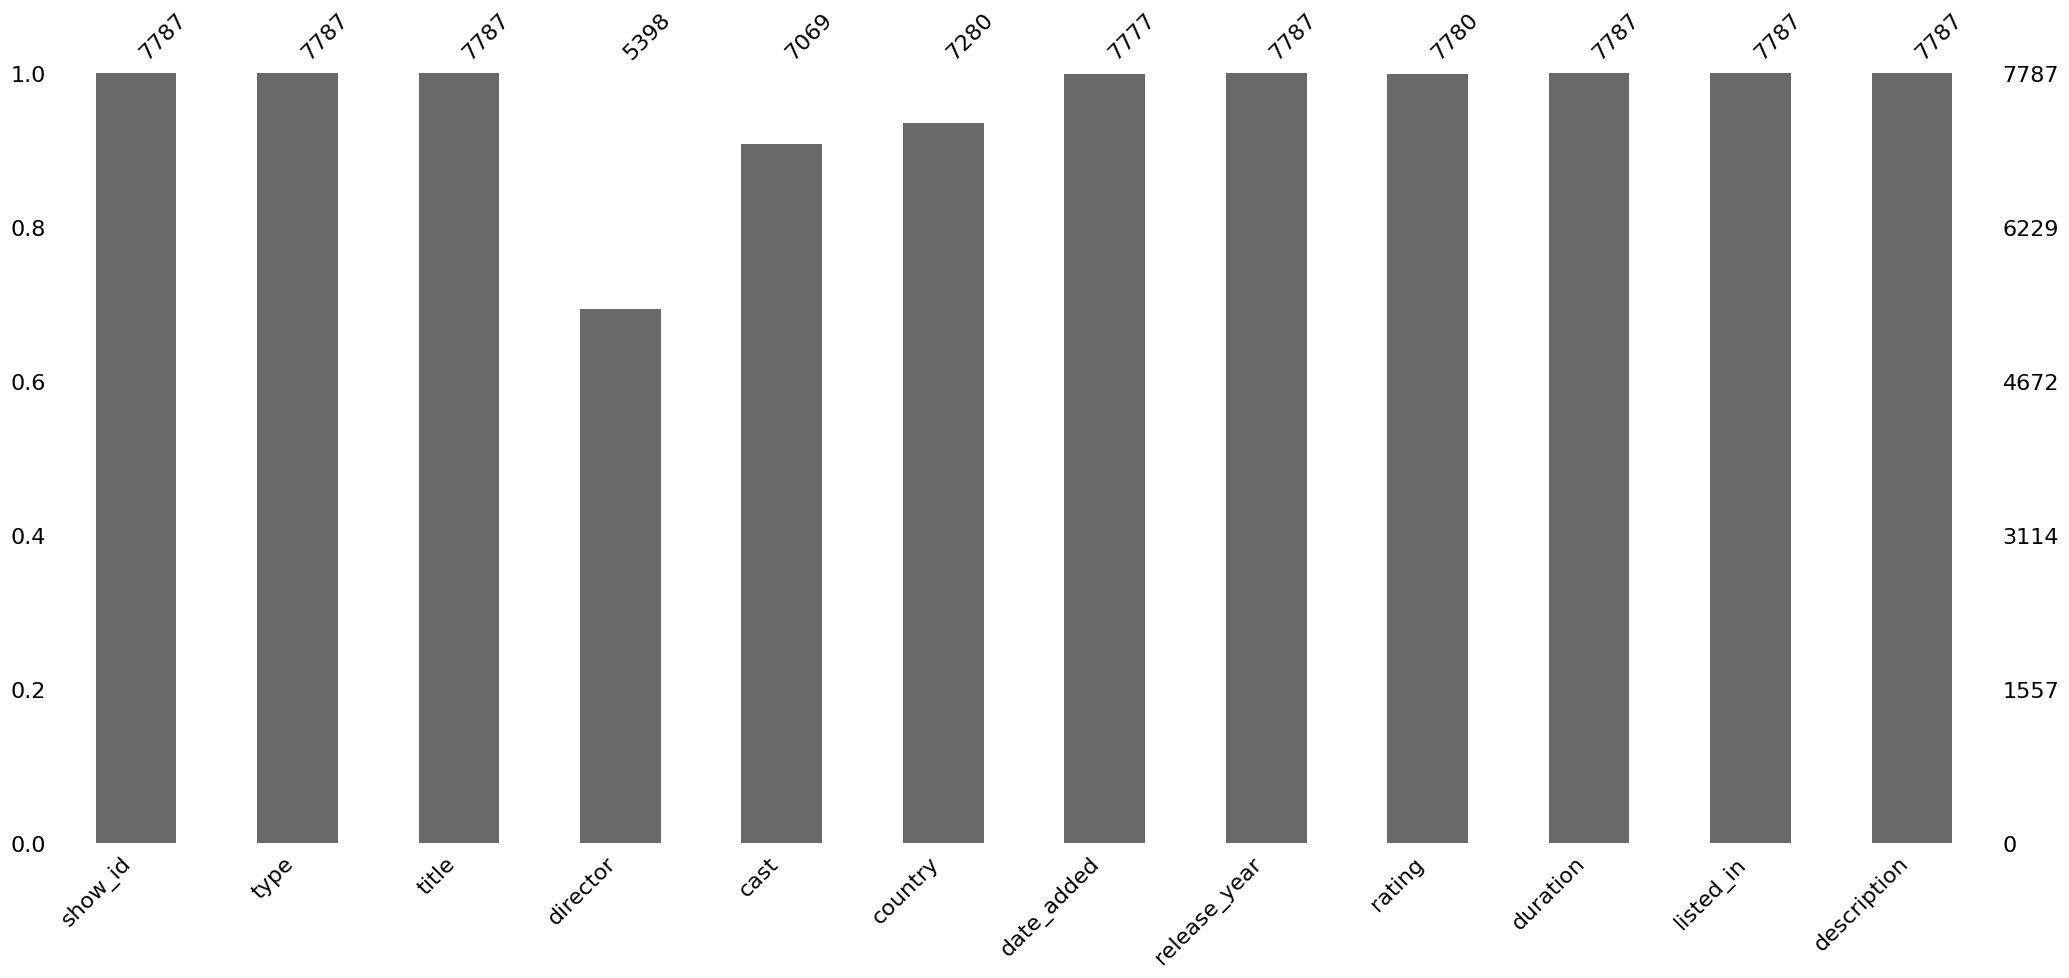

In [10]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"RaÃºl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
  unique_values = df[column].unique()
  print(f"Unique values for {column}: {unique_values}" )


Unique values for show_id: ['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
Unique values for type: ['TV Show' 'Movie']
Unique values for title: ['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
Unique values for director: [nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
Unique values for cast: ['JoÃ£o Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, ZezÃ© Motta, Celso Frateschi'
 'DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']
Unique values for country: ['Brazil' 'Mexico

## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Write your code to make your dataset analysis ready.

df.dropna(inplace=True)

In [12]:
df.shape

(4808, 12)

<Axes: >

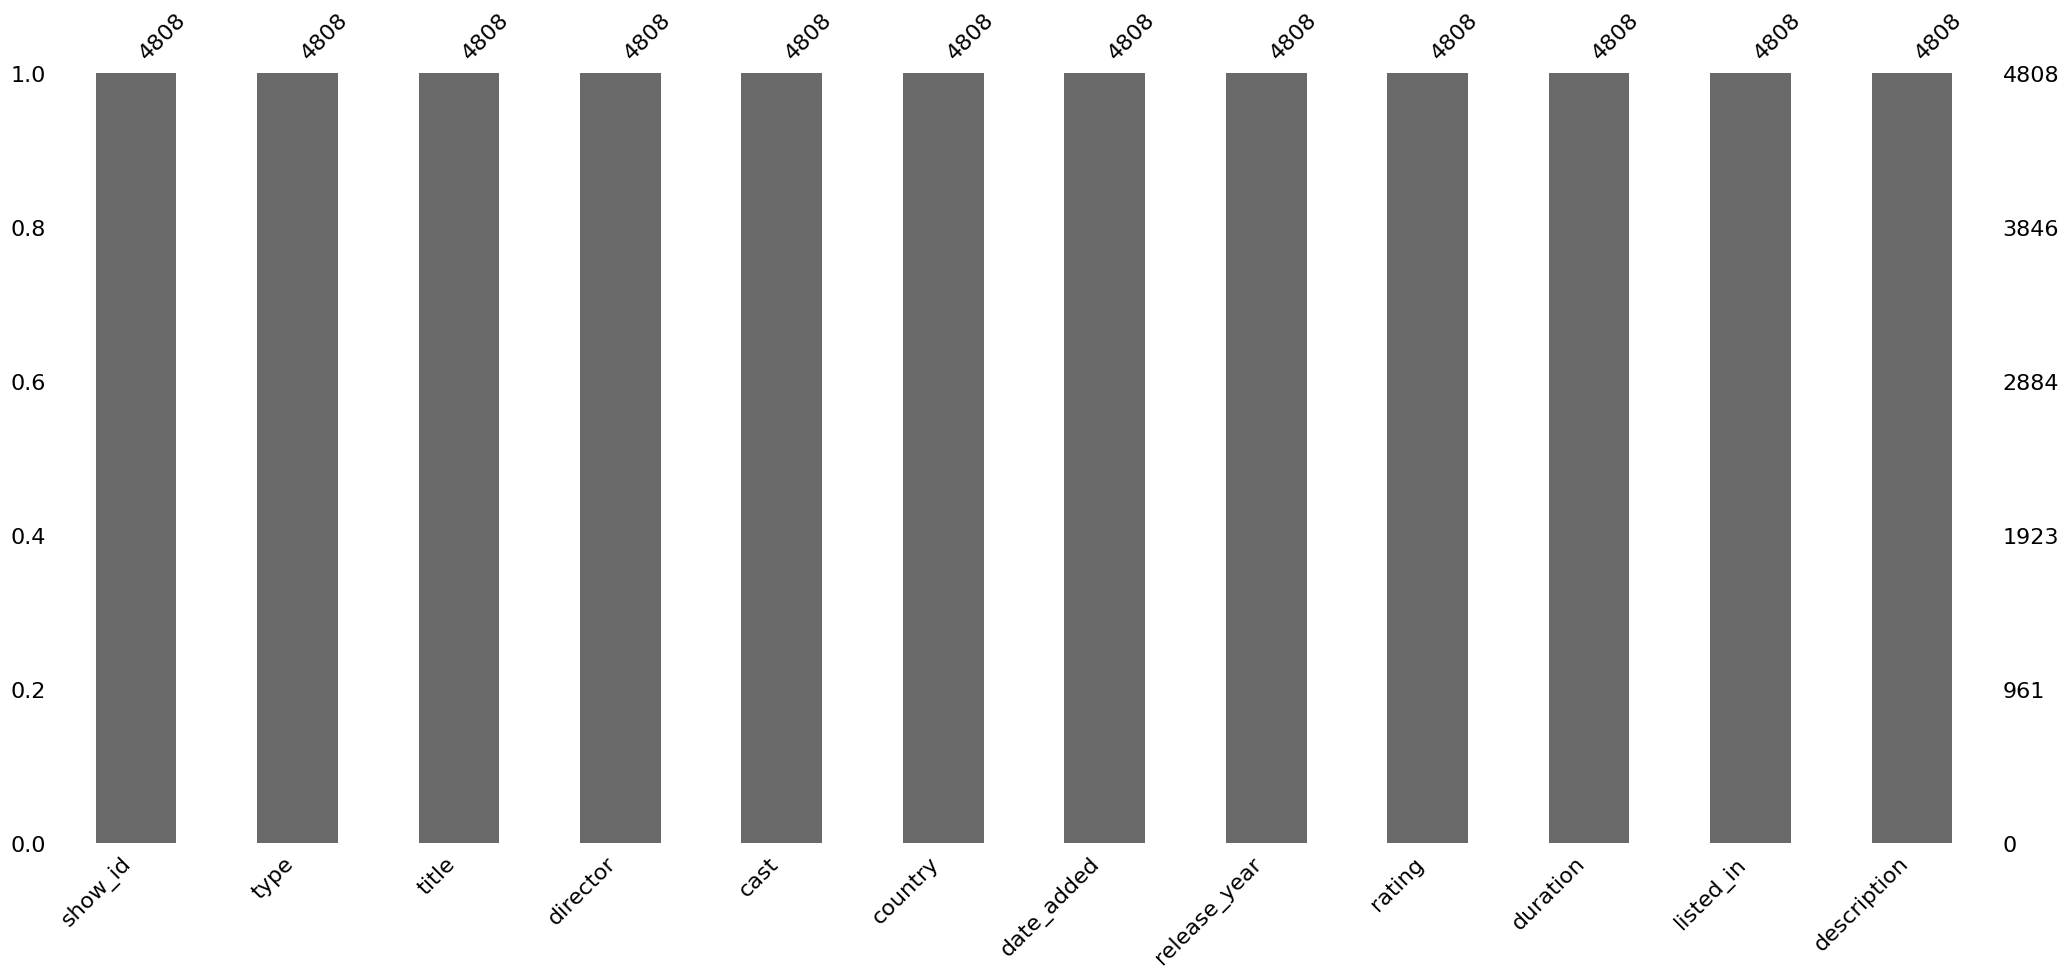

In [13]:
msno.bar(df)

In [31]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['age_rating'] = df['rating'].replace(rating_ages)
df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Kids', 'Older Kids'],
      dtype=object)

In [32]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_rating
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens
5,s6,TV Show,46,Serdar Akar,"Erdal BeÅikÃ§ioÄlu, Yasemin Allen, Melis Bir...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Adults
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,Adults
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Older Kids
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Analyze the type of content available on Netflix

In [24]:
# Chart - 1 visualization code
# Plotting the countplot
import pandas as pd

# Load the Netflix dataset
# Count the number of TV shows and movies
tv_show_count = df[df['type'] == 'TV Show'].shape[0]
movie_count = df[df['type'] == 'Movie'].shape[0]

# Print the results
print("Number of TV Shows:", tv_show_count)
print("Number of Movies:", movie_count)


Number of TV Shows: 135
Number of Movies: 4673


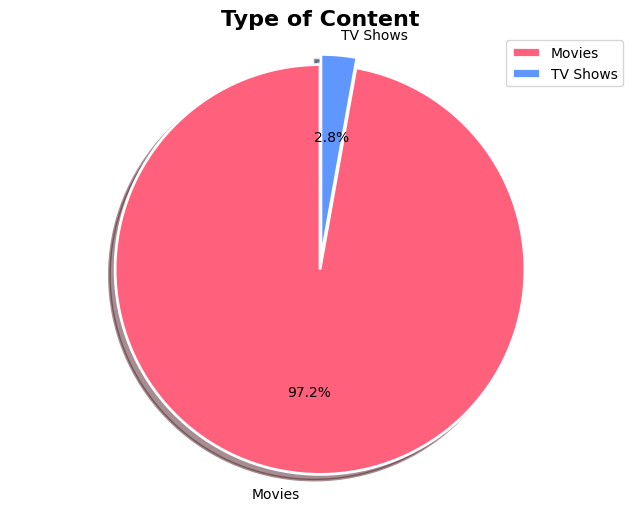

In [28]:
# Load the Netflix dataset
# Count the number of TV shows and movies
tv_show_count = df[df['type'] == 'TV Show'].shape[0]
movie_count = df[df['type'] == 'Movie'].shape[0]

# Parameters for the graph
plt.figure(figsize=(8, 6))
wedgeprops = {"linewidth": 2, "edgecolor": "white"}
labels = ["Movies", "TV Shows"]
values = [movie_count, tv_show_count]

# Custom colors for the pie chart
colors = ['#FF617D', '#6096FF']

# Explode the slice for emphasis
explode = [0.05, 0]

# Plotting the graph
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, wedgeprops=wedgeprops, shadow=True)

# Title and legend
plt.title('Type of Content', fontsize=16, fontweight='bold')
plt.legend(loc='best')

# Set aspect ratio to be equal for a circular pie chart
plt.axis('equal')

# Display the pie chart
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 Age Rating Distribution

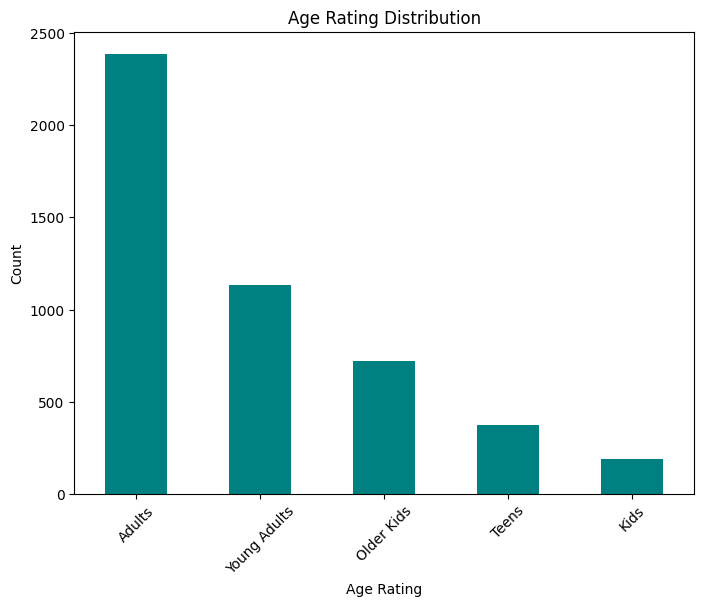

In [33]:
# Chart - 2 visualization code
# Count the number of occurrences for each age rating
age_rating_counts = df['age_rating'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
age_rating_counts.plot(kind='bar', color='teal')
plt.xlabel('Age Rating')
plt.ylabel('Count')
plt.title('Age Rating Distribution')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

The bar chart was selected because it effectively displays the distribution of age ratings as discrete categories. The x-axis represents the different age rating categories, while the y-axis represents the count of content falling into each category. Bar charts are commonly used for visualizing categorical data and making comparisons between different categories.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insights into the distribution of age ratings for the content in the Netflix dataset. By analyzing the heights of the bars, we can observe which age ratings are more prevalent or have a higher count in the dataset. This analysis helps understand the proportion of content that is suitable for different age groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
The insights gained from the age rating analysis can have a positive business impact. Understanding the distribution of age ratings allows content providers to ensure they have a diverse range of content suitable for different target audiences. It helps in tailoring content acquisition, content recommendation algorithms, and marketing strategies to meet the preferences and needs of different age groups. This can result in improved user satisfaction, increased engagement, and potentially attract a wider user base.

Negative growth insights:
Negative growth insights may arise if the analysis reveals an imbalance in the distribution of age ratings. For example, if the majority of content falls into a specific age rating category, it may indicate a lack of diversity or appeal to other age groups. This could potentially limit the platform's ability to attract and retain users outside of that specific age group. Addressing this imbalance by acquiring or producing content suitable for other age groups can help mitigate negative growth implications.

#### Chart - 3

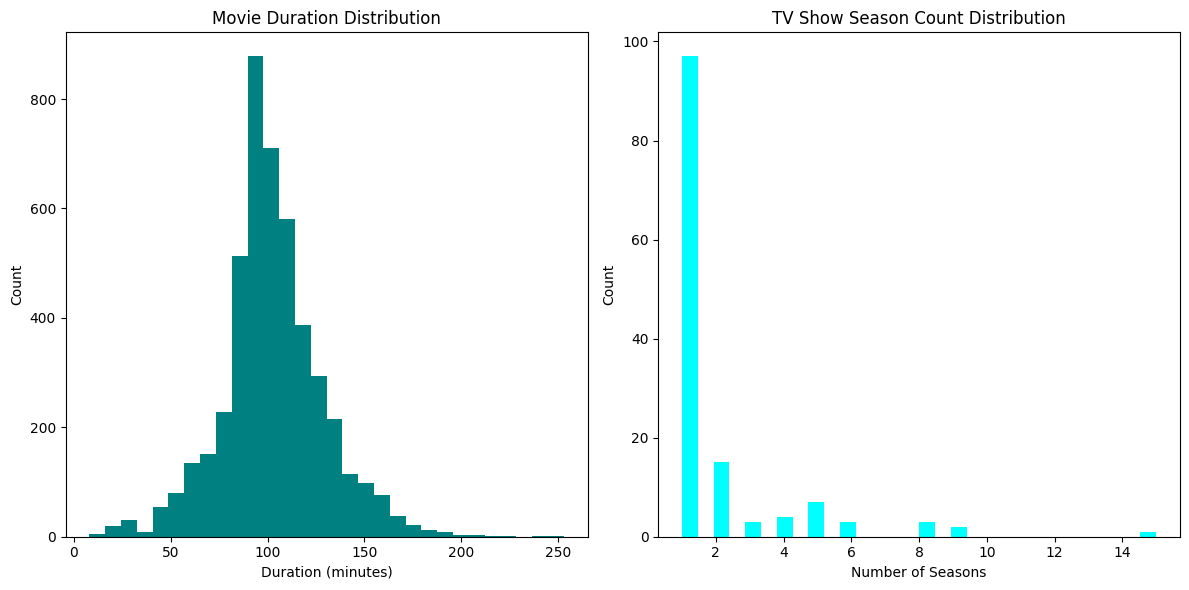

In [37]:
# Chart - 3 visualization code
import pandas as pd
import matplotlib.pyplot as plt
import re

# Extract relevant columns
duration_data = df[['type', 'duration']]

# Separate movies and TV shows
movies = duration_data[duration_data['type'] == 'Movie']
tv_shows = duration_data[duration_data['type'] == 'TV Show']

# Convert movie duration to numeric values (in minutes)
movies['duration'] = movies['duration'].str.extract('(\d+)').astype(float)

# Convert TV show duration to numeric values (number of seasons)
tv_shows['duration'] = tv_shows['duration'].apply(lambda x: re.findall(r'\d+', x)[0]).astype(int)

# Summary statistics
movies_stats = movies['duration'].describe()
tv_shows_stats = tv_shows['duration'].describe()

# Plotting the histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(movies['duration'], bins=30, color='teal')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.title('Movie Duration Distribution')

plt.subplot(1, 2, 2)
plt.hist(tv_shows['duration'], bins=30, color='aqua')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.title('TV Show Season Count Distribution')

plt.tight_layout()
plt.show()





##### 1. Why did you pick the specific chart?

The choice of a histogram for Content Duration Analysis was made to visualize the distribution of content durations in a clear and concise manner. Histograms are commonly used to display the frequency or count of data within specified bins or ranges, making them suitable for analyzing the distribution of durations for movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

Movie Duration Distribution:

The histogram provides insights into the distribution of movie durations in terms of minutes.
It helps identify common duration ranges and the corresponding count of movies falling into each range.
The height of the bars indicates the frequency or count of movies within each duration range.

TV Show Season Count Distribution:

The histogram displays the distribution of TV show season counts.
It reveals the prevalence of TV shows with different numbers of seasons.
The height of the bars represents the count of TV shows falling into each season count range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
The gained insights can have a positive business impact in several ways:

Content Acquisition and Production: Understanding the distribution of movie durations and TV show season counts can guide decisions related to content acquisition and production. It helps in selecting content with durations that align with user preferences and expectations. Additionally, it can inform decisions regarding the creation of TV shows with specific season counts that appeal to target audiences.

User Engagement and Satisfaction: Analyzing content durations can contribute to better user engagement and satisfaction. By offering a diverse range of content with varying durations, Netflix can cater to the preferences of different viewers. It enables users to choose content that fits their available time and viewing preferences, potentially leading to increased user satisfaction and engagement.

Negative growth insights:
While the chart does not inherently provide negative growth insights, there might be implications if certain duration ranges or season counts are significantly underrepresented or less appealing to the target audience. For example:

Imbalance in Content Offerings: If the chart reveals a large majority of content falling within a narrow range of durations or season counts, it might indicate a lack of diversity. This could potentially limit the platform's appeal to viewers who prefer content with different durations or season structures. Addressing such imbalances by acquiring or producing content that caters to a wider range of preferences can help avoid negative growth implications.

#### Chart - 4

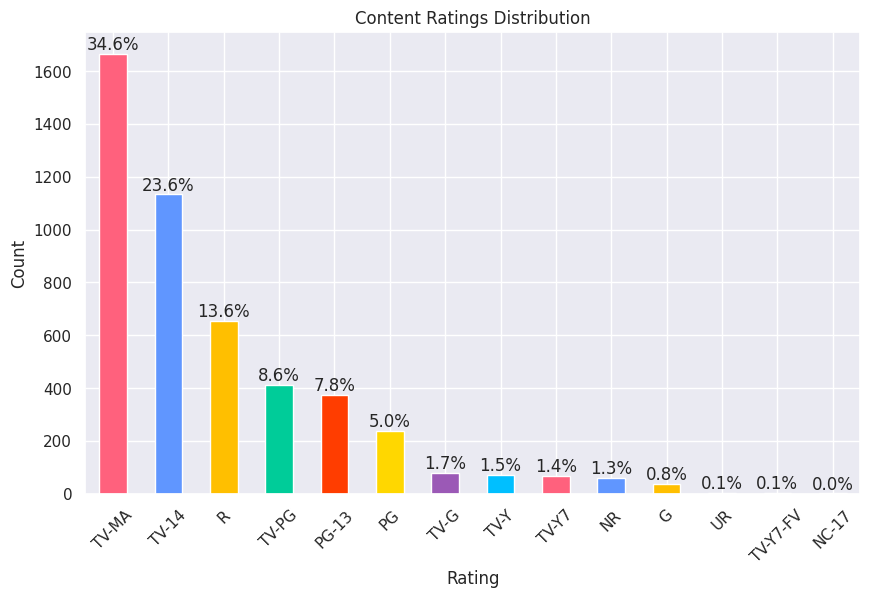

In [43]:
# Chart - 4 visualization code
# Extract relevant columns


# Extract relevant columns
rating_data = df['rating']

# Count the occurrences of each rating
rating_counts = rating_data.value_counts()

# Calculate the percentage of each rating
rating_percentages = rating_counts / rating_counts.sum() * 100

# Define custom colors for each rating category
colors = ['#FF617D', '#6096FF', '#FFBF00', '#00CC99', '#FF3D00', '#FFD700', '#9B59B6', '#00BFFF']

# Plotting the bar chart with custom colors and percentage labels
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color=colors)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Content Ratings Distribution')
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for i, count in enumerate(rating_counts):
    percentage = rating_percentages[i]
    plt.text(i, count + 1, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()



In [46]:
#Creating 2 new dataframes for movies and TV shows
df_tv = df[df["type"] == "TV Show"]
df_movies =[df["type"] == "Movie"]

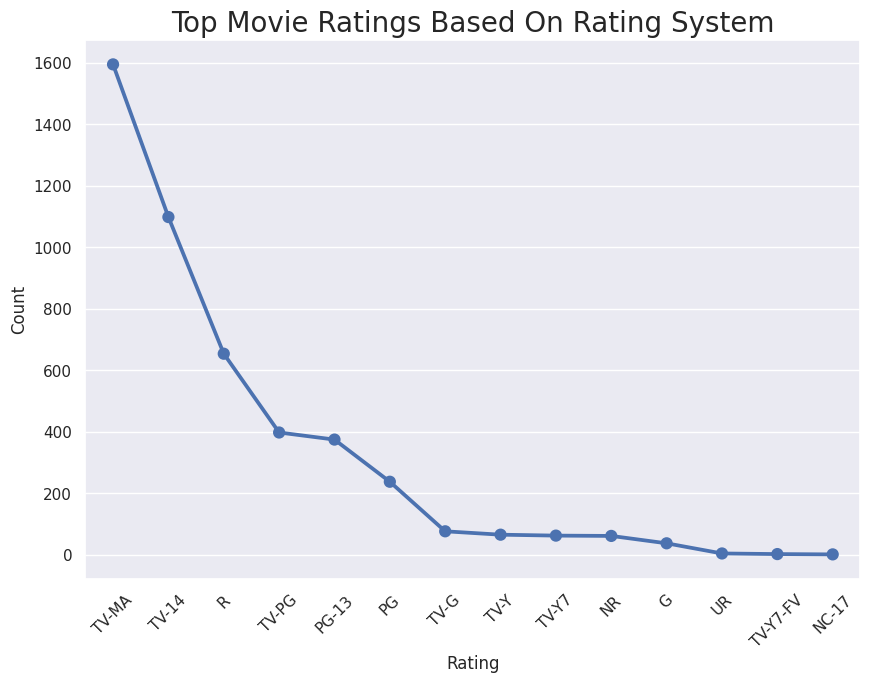

In [58]:
#Plotting the ratings on movies on pointplot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Netflix dataset
# df = pd.read_csv('netflix_dataset.csv')?

# Filter for movies
df_movies = df[df['type'] == 'Movie']

# Group by rating and count the number of movies
movie_ratings = df_movies['rating'].value_counts().reset_index()
movie_ratings.columns = ['rating', 'count']
movie_ratings = movie_ratings.sort_values(by='count', ascending=False)

# Plotting the point plot
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating', y='count', data=movie_ratings, ax=ax)
plt.title('Top Movie Ratings Based On Rating System', size=20)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




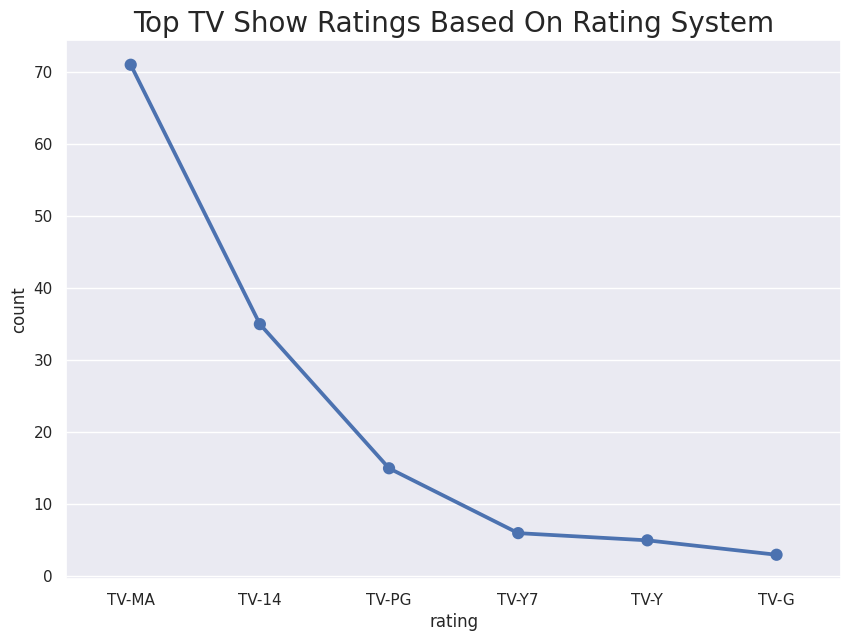

In [59]:
#Plotting the ratings on TV Shows on pointplot
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()


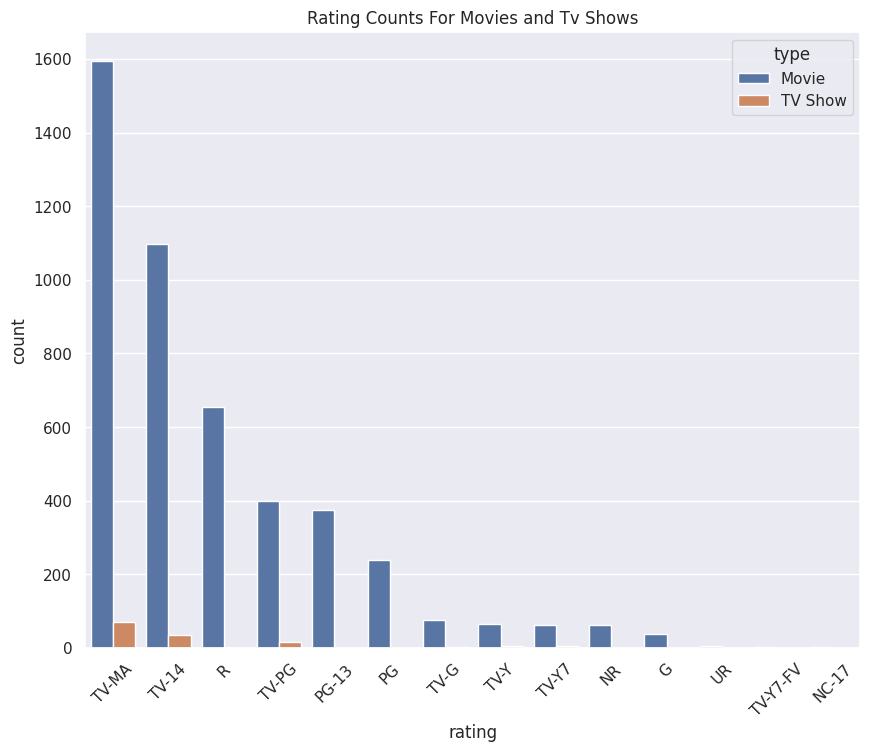

In [61]:
#Plotting the same on a comparison plot
sns.set()
plt.figure(figsize=(10,8))
ax=sns.countplot(x="rating",data= df,hue= "type",order =df['rating'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.title("Rating Counts For Movies and Tv Shows")
plt.show()


##### 1. Why did you pick the specific chart?

The 'TV-MA' rating is used in the majority of the film. The TV Parental Guidelines provide a "TV-MA" classification to a television programme that is intended solely for mature audiences.

##### 2. What is/are the insight(s) found from the chart?

The second largest is 'TV-14,' which stands for content that may be inappropriate for minors under the age of 14.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The third most common is the extremely popular 'R' rating. The Motion Picture Association of America defines an R-rated film as one that contains material that may be inappropriate for children under the age of 17; the MPAA states that "Under 17 requires accompanying parent or adult guardian."

#### Chart - 5 Growth in content over the years

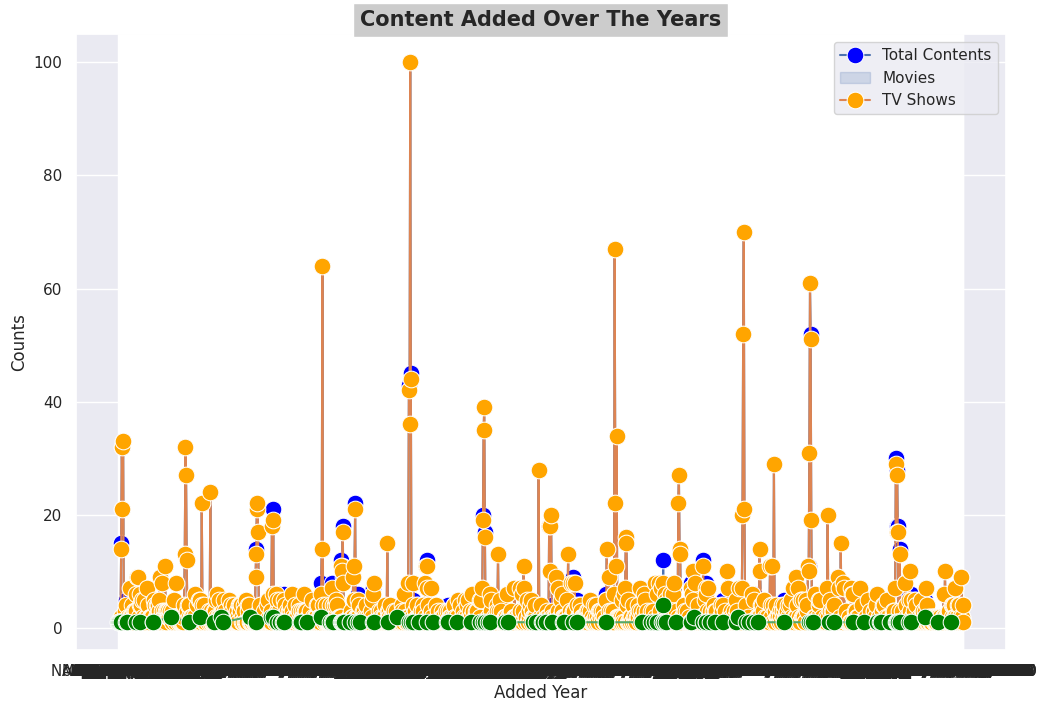

In [65]:
# Chart - 5 visualization code

sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

col = "date_added"  # Replace with the correct column name for year of content addition

tv = df_tv[col].value_counts().reset_index().sort_values('index')
tv = tv.rename(columns={col: "count", "index": col})
tv = tv.sort_values(col)

movies = df_movies[col].value_counts().reset_index().sort_values("index")
movies = movies.rename(columns={col: "count", "index": col})
movies = movies.sort_values(col)

total = df[col].value_counts().reset_index().sort_values("index")
total = total.rename(columns={col: "count", "index": col})
total = total.sort_values(col)

trace3 = sns.lineplot(x=total[col], y=total["count"], data=df, linestyle='solid', marker='o',
                      markerfacecolor='blue', markersize=12)
trace2 = sns.lineplot(x=movies[col], y=movies["count"], data=df_movies, linestyle='solid', marker='o',
                      markerfacecolor='orange', markersize=12)
trace1 = sns.lineplot(x=tv[col], y=tv["count"], data=df_tv, linestyle='solid', marker='o',
                      markerfacecolor='green', markersize=12)
label = ['Total Contents', 'Movies', 'TV Shows']
plt.legend(label)
plt.title("Content Added Over The Years", fontsize=15, fontweight='bold',
          bbox={'facecolor': '0.8', 'pad': 5})
plt.ylabel('Counts')
plt.xlabel('Added Year')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***